In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [4]:
from text_recognizer.datasets import EmnistDataset, EmnistLinesDataset, Transpose, construct_image_from_string, get_samples_by_character

In [5]:
transform = [{"type": "ToTensor", "args": None}, 
             {"type": "ApplyContrast", "args": {"low": 0.0, "high": 0.15}},
             {"type": "RandomAffine", "args": {"degrees": [-0.25, 0.25], "scale": [0.9, 1.0]}}
            ]

In [6]:
emnist_lines = EmnistLinesDataset(train=True,
                                  max_length = 60,
                                  min_overlap = 0.0,
                                  max_overlap = 0.3,
                                  num_samples = 50_000,
                                 transform=transform,
                                 )

In [7]:
emnist_lines.load_or_generate_data()

2021-01-02 22:02:47.979 | DEBUG    | text_recognizer.datasets.emnist_lines_dataset:_load_data:152 - EmnistLinesDataset loading data from HDF5...


In [8]:
def convert_y_label_to_string(y, emnist_lines=emnist_lines):
    return ''.join([emnist_lines.mapper(i) for i in y])

/home/akternurra/.pyenv/versions/3.8.2/envs/text-recognizer/lib/python3.8/site-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")


412 We______________________________________________________
new structure that for supporting the basic_________________
expect______________________________________________________
you come out when you saw them gang up on___________________
fashion Passing_____________________________________________
life________________________________________________________
in__________________________________________________________
that________________________________________________________
a dilution of the intermediate sera to______________________
and Wilson remaining ashore determined to catch_____________
are of two types participation______________________________
nonetheless_________________________________________________
will begin as soon as the shelter is occupied_______________
their orbits but allows the wind to bend a blade____________


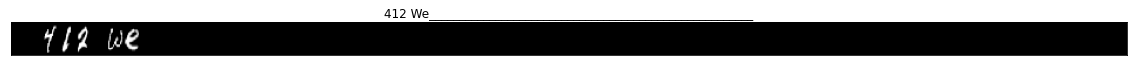

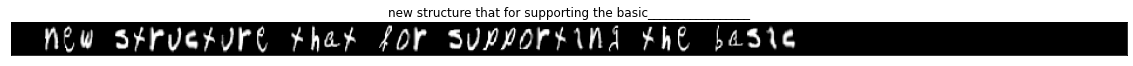

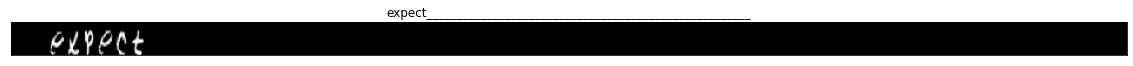

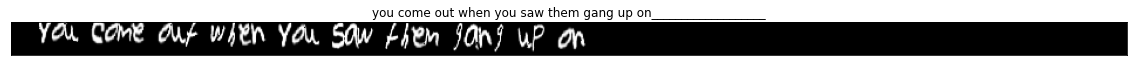

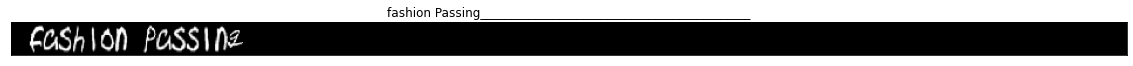

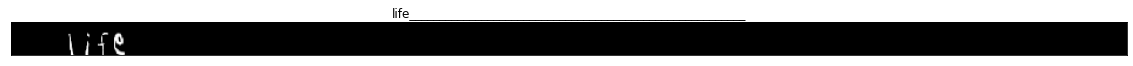

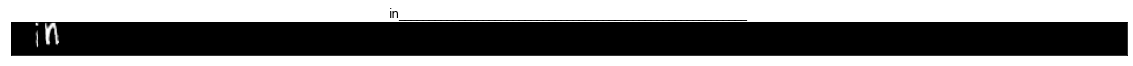

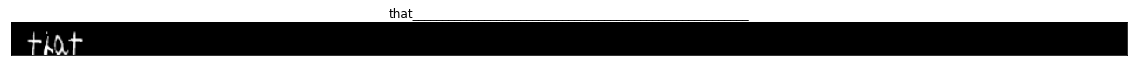

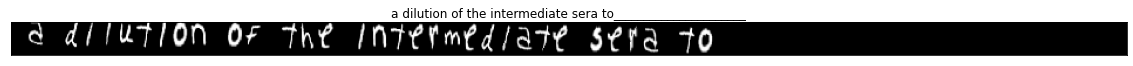

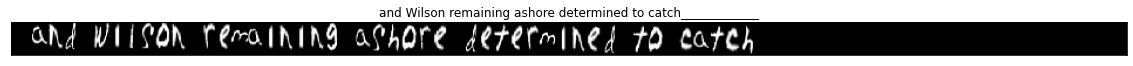

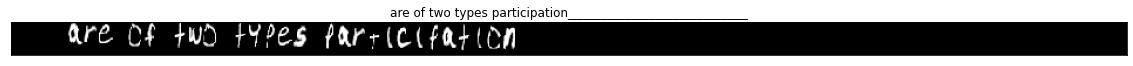

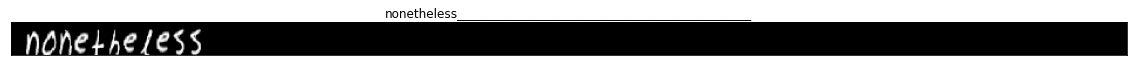

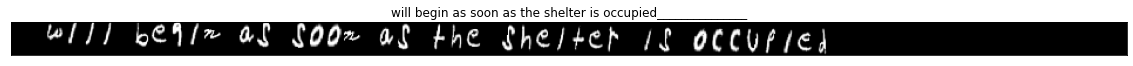

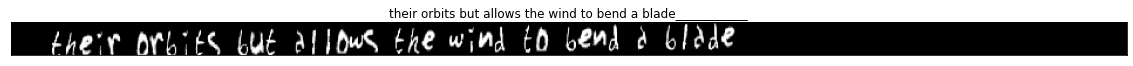

In [9]:
num_samples_to_plot = 14

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    data, target = emnist_lines[i]
    sentence = convert_y_label_to_string(target.numpy()) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0), cmap='gray')
    plt.xticks([])
    plt.yticks([])

In [36]:
print(emnist_lines)

EMNIST Lines Dataset
Max length: 50
Min overlap: 0.0
Max overlap: 0.2
Num classes: 80
Input shape: (28, 1400)
Data: (35000, 28, 952)
Tagets: (35000, 50)

